# Enter Your User Token And Cell ID

In [1]:
user_token = ""
# Input your Amplabs user token inside the quotation mark, or type your user token after executing this block of code

cell_id = "" 
# Input your Amplabs cell ID inside the quotation mark, or type your cell ID after executing this block of code


if user_token.strip(): 
    pass 
else: 
    user_token=input("Enter your Amplabs user token: ")


if cell_id.strip(): 
    pass 
else: 
    cell_id=input("Enter your Amplabs cell ID: ")

Enter your Amplabs user token: user_token
Enter your Amplabs cell ID: cell_id


# AmpLabs Example





In this demo you will learn how to:

1. Upload/Download various types of battery data from **AmpLabs JSON API**
2. Perform simple filtering on battery data

**Pandas** is an easy-to-use data structures and data analysis tools for the Python programming language. In Pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc. When working with tabular data, such as data stored in spreadsheets or databases, pandas will help you to explore, clean, and process your data. In pandas, a data table is called a **Data Frame**.

Note: Pandas is built off of another library called **NumPy**. 


# Key Terms

**API** Application Programming Interface is a set of definitions and protocols for building and integrating application software. AmpLabs provides an API to help you access and control your data.

**JavaScript Object Notation** is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. Win/Win

[JSON](https://www.json.org/json-en.html) is commonly used as an output format from websites. AmpLabs provides a JSON API for your Battery Data. Records for your battery data look like the following: 

``` JSON
{
  "detail": "Records Retrieved", 
  "records": [
    {
      "Charge_Capacity (Ah)": 2.563, 
      "Charge_Energy (Wh)": 10.029, 
      "Cycle_Index": 1, 
      "Discharge_Capacity (Ah)": 2.709, 
      "Discharge_Energy (Wh)": 9.424, 
      "End_Time": null, 
      "Max_Current (A)": 1.496, 
      "Max_Voltage (V)": 4.2, 
      "Min_Current (A)": -1.503, 
      "Min_Voltage (V)": 1.999, 
      "Start_Time": null, 
      "Test_Time (s)": 14644.703
    },
    "status": 200
}
```

**Data Frame**. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
[Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)



``` Python
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
```

In [2]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn

You should consider upgrading via the 'c:\users\huang\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Import the libraries we downloaded into the Python environment

In [3]:
# Useful for fetching data from the web 

import json
import urllib.error
import urllib.request
from urllib.parse import urlencode
import requests
import gzip
import json
from fileinput import filename
import shutil
import time
import matplotlib.pyplot as plt
import seaborn as sns

# PyData Libraries

import pandas as pd
import numpy as np

# Define Helper Functions

The following section defines functions that will help us **read** data from and **write** data to the AmpLabs JSON API. 



### Functions to help Upload Data to AmpLabs




In [4]:
# Function used to fetch cycle data from AmpLabs
def get_amplabs_cycledata(user_token, cell_id):
    url = "http://www.app.amplabs.ai/download/cells/cycle_data_json?cell_id={}".format(cell_id.replace('/','%2F'))
    httprequest = urllib.request.Request( url, method="GET")
    httprequest.add_header("Authorization", "Bearer {}".format(user_token))
    try:
        with urllib.request.urlopen(httprequest) as httpresponse:
            res = json.loads(httpresponse.read())
            with urllib.request.urlopen(urllib.request.Request(res["response_url"],method="GET")) as response:
                response = gzip.decompress(response.read())
                return json.loads(response.decode()), 1
    except urllib.error.HTTPError as e:
        print(e)
    return None, 0

# Function used to fetch timeseries data from AmpLabs
def get_amplabs_timeseriesdata(user_token, cell_id):
    url = "http://www.app.amplabs.ai/download/cells/cycle_timeseries_json?cell_id={}".format(cell_id.replace('/','%2F'))
    httprequest = urllib.request.Request(
            url, method="GET"
        )
    httprequest.add_header("Authorization", "Bearer {}".format(user_token))

    try:
        with urllib.request.urlopen(httprequest) as httpresponse:
            res = json.loads(httpresponse.read())
            with urllib.request.urlopen(urllib.request.Request(res["response_url"],method="GET")) as response:
                response = gzip.decompress(response.read())
                return json.loads(response.decode()) , 1
    except urllib.error.HTTPError as e:
        print(e)
    return None, 0


# Function used to fetch test meta data from AmpLabs
def get_amplabs_meta(user_token, cell_id):
    url = 'https://www.app.amplabs.ai/cells/tests/cycle/metaWithId?cell_id={}'.format(cell_id.replace('/','%2F'))
    print(url)
    httprequest = urllib.request.Request( url, method="GET")
    httprequest.add_header("Authorization", "Bearer {}".format(user_token))
    try:
        with urllib.request.urlopen(httprequest) as httpresponse:
            response = json.loads(httpresponse.read())
            return response, 1
    except urllib.error.HTTPError as e:
        print(e)
    return None, 0


**Check your understanding**
1. What is JSON? 

2. Is JSON machine readable?

3. What is a GET Request?

# Get Amplabs Metadada

In [5]:
get_amplabs_meta(user_token, cell_id)

https://www.amplabs.ai/cells/tests/cycle/metaWithId?cell_id=cell_id


({'detail': 'Records Retrieved', 'records': [[]], 'status': 200}, 1)

# Get Amplabs Timeseries Data

Timeseries data shows the data of a full battery test.  A full battery test typically spans a few months and have around a thousand charge and discharge cycles. The timeseries data has "time" in the x-axis and various properties of the **state of the battery** such as "voltage," "power," or "current" as the y-axis.

In [6]:
response, status = get_amplabs_timeseriesdata(user_token, cell_id)
df = pd.DataFrame(response['records'][0])
df["pandas_dataframe_index"]=df.index

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   pandas_dataframe_index  0 non-null      object
dtypes: object(1)
memory usage: 0.0+ bytes
None


### Define the x-axis, y-axis, and data point limit below, using the column names above

In [8]:
timeseries_number_of_data_points_limit=100
timeseries_data_x_axis="pandas_dataframe_index"
timeseries_data_y_axis="datapoint_dtemp"

KeyError: 'datapoint_dtemp'

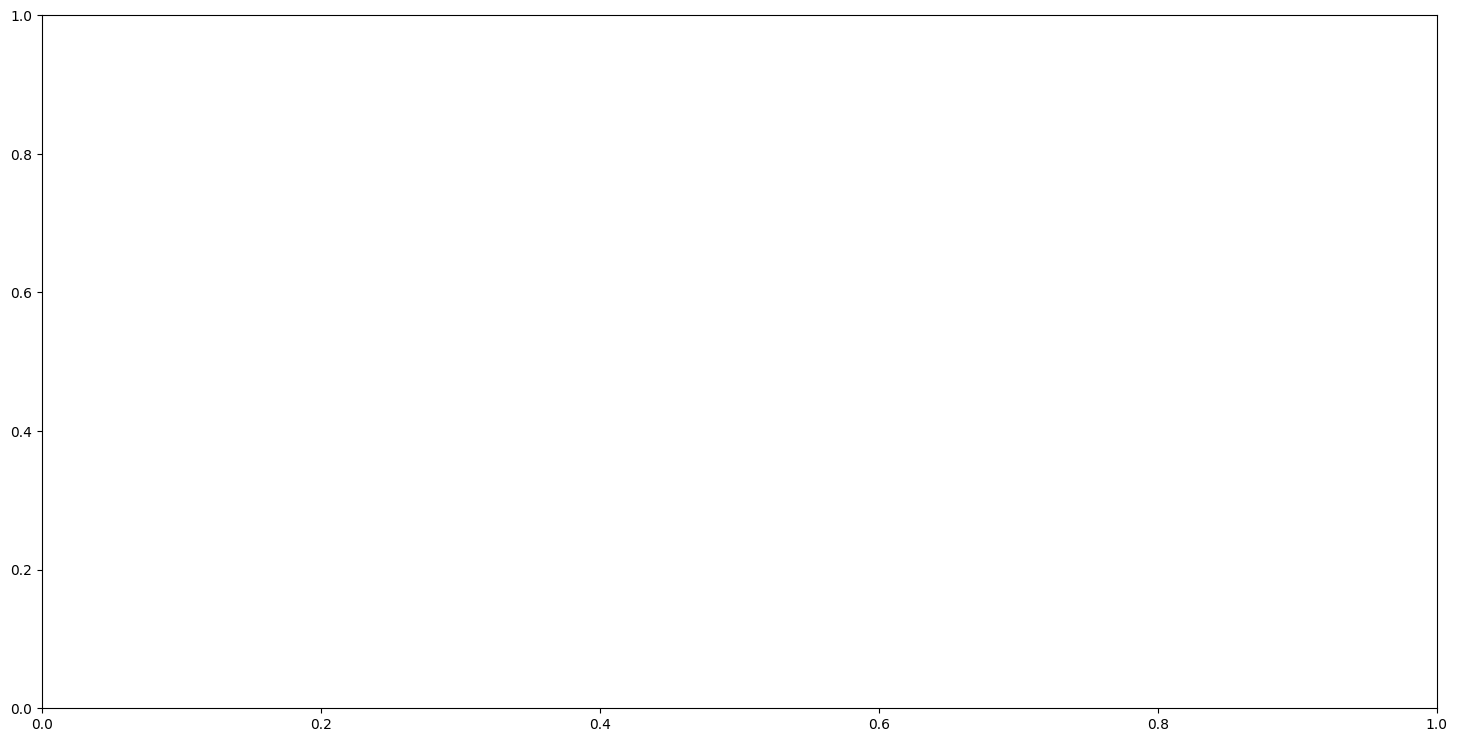

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))

ax.plot(df[timeseries_data_x_axis].iloc[0:timeseries_number_of_data_points_limit],df[timeseries_data_y_axis].iloc[0:timeseries_number_of_data_points_limit],label=f"{timeseries_data_y_axis}",color="blue")

ax.legend(fontsize=13)
ax.set_title(f'Amplabs Timeseries Data',fontsize=18)
ax.set_xlabel(f"{timeseries_data_x_axis}",fontsize=18)
ax.set_ylabel(f"{timeseries_data_y_axis}",fontsize=18)

# Get Amplabs Cycle Data

The Amplabs cycle data draws from the same full battery test as the timeseries data does. However, the cycle data has "cycle index number" as the x-axis and various properties of **one complete battery cycle** such as "cycle duration" or "cycle charge capacity" as the y-axis.

In [ ]:
response, status = get_amplabs_cycledata(user_token, cell_id)
df_cycle = pd.DataFrame(response['records'][0])
df_cycle["pandas_dataframe_index"]=df_cycle.index

In [ ]:
print(df_cycle.info())

### Define the x-axis, y-axis, and data point limit below, using the column names above

In [ ]:
cycle_number_of_data_points_limit=1000
cycle_data_x_axis="pandas_dataframe_index"
cycle_data_y_axis="cycle_energy_efficiency"

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,9))

ax.plot(df_cycle[cycle_data_x_axis].iloc[0:cycle_number_of_data_points_limit],df_cycle[cycle_data_y_axis].iloc[0:cycle_number_of_data_points_limit],label=f"{cycle_data_y_axis}",color="blue")

ax.legend(fontsize=13)
ax.set_title(f'Amplabs Cycle Data',fontsize=18)
ax.set_xlabel(f"{cycle_data_x_axis}",fontsize=18)
ax.set_ylabel(f"{cycle_data_y_axis}",fontsize=18)